# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from ReplayBuffer import ReplayBuffer
from Agent import Agent 
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


## Train the Agent
Running the block of code below will iterate up to 5000 times, playing the game and teaching the agent. Once the environment is considered solved (mean average of both players >= .5), it will save the model weights of the both agents and plot the rewards. 


C:\ProgramData\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[Episode 100]	Average Score (Last 100 episodes): 0.0250
[Episode 200]	Average Score (Last 100 episodes): 0.0420
[Episode 300]	Average Score (Last 100 episodes): 0.0480
[Episode 400]	Average Score (Last 100 episodes): 0.0660
[Episode 500]	Average Score (Last 100 episodes): 0.0910
[Episode 600]	Average Score (Last 100 episodes): 0.0610
[Episode 700]	Average Score (Last 100 episodes): 0.0610
[Episode 800]	Average Score (Last 100 episodes): 0.0760
[Episode 900]	Average Score (Last 100 episodes): 0.1080
[Episode 1000]	Average Score (Last 100 episodes): 0.0910
[Episode 1100]	Average Score (Last 100 episodes): 0.1730
[Episode 1200]	Average Score (Last 100 episodes): 0.1959
[Episode 1300]	Average Score (Last 100 episodes): 0.1389
[Episode 1400]	Average Score (Last 10

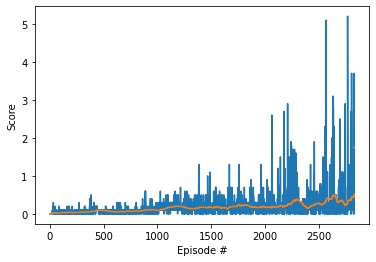

In [5]:
n_episodes = 5000
scores_window = deque(maxlen=100)
all_scores = []
average = []
memory = ReplayBuffer(action_size, seed=0)                                 # Shared memory buffer
agentA = Agent(state_size, action_size, memory, 0)                         # instance of first agent
agentB = Agent(state_size, action_size, memory, 1)                         # instance of second agent

for i_episode in range(1, n_episodes+1):
    t = 0
    env_info = env.reset(train_mode=True)[brain_name]                       # reset the environment    
    states = np.reshape(env_info.vector_observations, (1, -1))              # get the current state per agent
    scores = np.zeros(num_agents)                                           # zero out scores per agent
    agentA.reset_noise()                                                    # reset noise on agent A for each episode
    agentB.reset_noise()                                                    # reset noise on agent B for each episode
    while True:
        t += 1
        actionA = agentA.get_action(states, add_noise=True)                 # Get the agent action, add noise to improve learning
        actionB = agentB.get_action(states, add_noise=True)                 # Get the agent action, add noise to improve learning
        actions = np.concatenate((actionA, actionB), axis=0).flatten()      # Combine agent actions
        env_info = env.step(actions)[brain_name]                            # send all actions to tne environment
        next_states = np.reshape(env_info.vector_observations, (1, -1))     # get next state per agent
        rewards = env_info.rewards                                          # get reward for per agent
        dones = env_info.local_done                                         # see if episode finished
        agentA.step(states, actions, rewards[0], next_states, dones[0], t)  # Train the agent
        agentB.step(states, actions, rewards[1], next_states, dones[1], t)  # Train the agent
        states = next_states                                                # set state to next_state for the next action
        scores += np.max(rewards)                                           # sum up the accumulated rewards
        if np.any(dones):                                                   # exit loop if episode finished
            break
    
    all_scores.append(np.max(scores))                                       # save all scores
    scores_window.append(np.max(scores))                                    # calculate moving window of maximum score
    average.append(np.mean(scores_window))                                  # save moving average
    
    if i_episode % 100 == 0:
        print('\r[Episode {}]\tAverage Score (Last 100 episodes): {:.4f}'.format(i_episode, np.mean(scores_window)))
    
    if np.mean(scores_window) >= .5 and i_episode >= 100:                                   # if we've solved, print results, save trained networks and break from the loop
            print('\r[Episode {}]\tAverage Score (Last 100 episodes): {:.4f}'.format(i_episode, np.mean(scores_window)))
            print('\nSolved in {} episodes!\tAverage Score (Last 100 episodes)={:.4f}'.format(i_episode - 1, np.mean(scores_window)))
            torch.save(agentA.actor_local.state_dict(), 'checkpoint_actorA.pth')            
            torch.save(agentA.critic_local.state_dict(), 'checkpoint_criticA.pth')          
            torch.save(agentB.actor_local.state_dict(), 'checkpoint_actorB.pth')            
            torch.save(agentB.critic_local.state_dict(), 'checkpoint_criticB.pth')          
            break

# plot scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(all_scores)), all_scores, label='scores')
plt.plot(np.arange(len(all_scores)), average, label='average')
plt.ylabel('Score')
plt.xlabel("Episode #")
plt.show()

In [6]:
n_episodes = 10
memoryA = ReplayBuffer(action_size, seed=0)
memoryB = ReplayBuffer(action_size, seed=0)
agentA = Agent(state_size, action_size, memoryA, 0)                         # instance of first agent
agentB = Agent(state_size, action_size, memoryB, 1)                         # instance of second agent
agentA.actor_local.load_state_dict(torch.load('checkpoint_actorA.pth'))
agentA.critic_local.load_state_dict(torch.load('checkpoint_criticA.pth'))
agentB.actor_local.load_state_dict(torch.load('checkpoint_actorB.pth'))
agentB.critic_local.load_state_dict(torch.load('checkpoint_criticB.pth'))

for i_episode in range(1, n_episodes+1):
    t = 0
    env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
    states = np.reshape(env_info.vector_observations, (1, -1))                   # get the current state per agent
    scores = np.zeros(num_agents)                          # zero out scores per agent
    while True:
        t += 1
        actionA = agentA.get_action(states, add_noise=False) # Get the agent action, add noise to improve learning
        actionB = agentB.get_action(states, add_noise=False) # Get the agent action, add noise to improve learning
        actions = np.concatenate((actionA, actionB), axis=0).flatten()
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = np.reshape(env_info.vector_observations, (1, -1))         # get next state per agent
        rewards = env_info.rewards                         # get reward for per agent
        dones = env_info.local_done                        # see if episode finished
        states = next_states                               # set state to next_state for the next action
        scores += np.max(rewards)                                      # sum up the accumulated rewards
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i_episode, np.max(scores)))
    

C:\ProgramData\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Score (max over agents) from episode 1: 0.20000000298023224
Score (max over agents) from episode 2: 0.4000000059604645
Score (max over agents) from episode 3: 0.20000000298023224
Score (max over agents) from episode 4: 0.30000000447034836
Score (max over agents) from episode 5: 0.30000000447034836
Score (max over agents) from episode 6: 0.20000000298023224
Score (max over agents) from episode 7: 0.10000000149011612
Score (max over agents) from episode 8: 0.7000000104308128
Score (max over agents) from episode 9: 0.20000000298023224
Score (max over agents) from episode 10: 0.30000000447034836


In [9]:
env.close

<bound method UnityEnvironment.close of <unityagents.environment.UnityEnvironment object at 0x0000018D3B55E400>>